# <font color=#ea4335>**Homework Week 6** : **Simple Linear Regression with Pyhton** </font>

Nama  : Andrea Natania <br>
NIM   : 23102010092 <br>
Kelas : BM2020C


### <font color=#1c72e9> **Step 1: Import packages and classes** </font>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

### <font color=#1c72e9> **Step 2: Provide Data** </font>


**Data description:**

Dataset below shows claims and the total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden

**Background:**

To estimate the total payments for all the claims in thousands of Swedish Kronor in Sweden from the total of claims.

<font color=#84C188> **Import Data** </font>

In [2]:
df = pd.read_excel("Andrea Natania_23102010092_ClassC.xls")
df

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


<font color=#84C188> **Data Cleaning** </font>

In [3]:
df = df.rename(columns={'X': 'waktu', 'Y': 'pemulihan biologis'})
df

,Claims,Payments
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


<font color=#9932CC> **The column name is changed from A to Claims (which means the number of claims), and B to Payments (which means total payments for all the claims)** </font>

In [4]:
df.isna().sum()

Claims      0
Payments    0
dtype: int64

<font color=#9932CC> **Here we check if there is null data, there is no null data.** </font>

In [5]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :")

Duplicate Rows :


<font color=#9932CC> **Here we check if there is duplicated data, there is no duplicated data. Hence the data cleaning is complete** </font>

### <font color=#1c72e9> **Step 3: Data Summary** </font>


In [6]:
df.describe() #memeunculkan summary dari data

,Claims,Payments
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


<font color=#9932CC> **Here we can see the data summary, there are 63 total data of claims and payments. The numbers of claims mean is 22.9 and the mean of payments is 98.19. The number of claims ranged from 0 to 124 claims and the total payments ranged from 0 to 422,2 thousand of Swedish Kronor** </font>

### <font color=#1c72e9> **Step 4: Data visualization** </font>


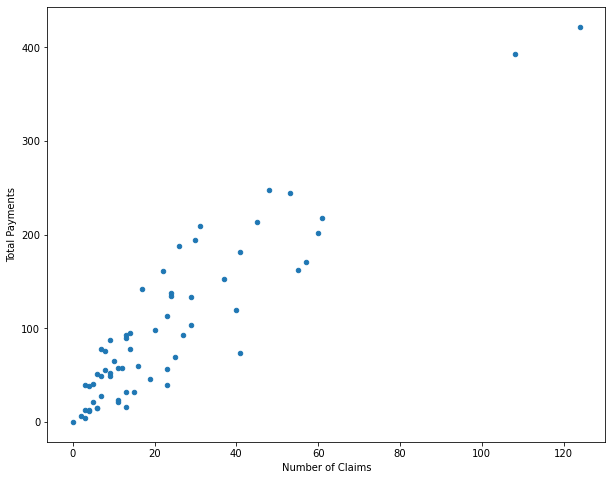

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
df.plot(x="Claims", y="Payments", ax=ax, kind='scatter')
plt.xlabel('Number of Claims')
plt.ylabel('Total Payments')
plt.show()

<font color=#9932CC> **Here we can see the scatter plot of the dataset, it shows that that this data is linear.** </font>

### <font color=#1c72e9> **Step 5: Create and Fit model** </font>


With `.fit()`, you calculate the optimal values of the weights $𝑏₀$ and $𝑏₁$, using the existing input and output ($x$ and $y$) as the arguments.


In [8]:
LR = LinearRegression()

In [9]:
X = df[['Claims']]
y = df[['Payments']]
model = LR.fit(X,y) # membuat model dari linear regression berdasarkan independent variable dan intedependent variable y

In [10]:
r_sq = model.score(X, y)
print('Coefficient of determination (R^2):', r_sq)  #mengeluarkan hasil perhitungannya dengan template

Coefficient of determination (R^2): 0.8333466719794502


<font color=#9932CC> **The R-squared is 0.8333466719794502 which means that 83.33% the variability data of the payments is accounted by the number of claims and since the R-squared is greater than 0.7 then the number of claims and the total payments have a positive linear relationship and is strongly related.** </font>

<font color=fanta>**Intercept - $b_0$** </font>


The attributes of model are `.intercept_`, which represents the coefficient, $𝑏_0$ and `.coef_`, which represents $𝑏_1$:


In [11]:
print('intercept:', model.intercept_)

intercept: [19.99448576]


In [12]:
print('intercept:', model.intercept_[0])

intercept: 19.994485759114795


<font color=#9932CC> **Here we get the constant of the simple linear regression equation which equals to 19.994485759114795** </font>

<font color=fanta>**Slope - $b_1$** </font>

In [13]:
print('slope:', model.coef_)

slope: [[3.41382356]]


In [14]:
print('slope:', model.coef_[0][0])

slope: 3.4138235600663673


<font color=#9932CC> **Here we get the coefficient of x in the simple linear regression equation which equals to 3.4138235600663673** </font>

### <font color=#1c72e9> **Step 6: Predict Response** </font>


To obtain the predicted response, use `.predict()`:

In [15]:
H = model.predict(X)
df['Estimated Payments'] = H   #[] - Di data frame, memilih kolom atau menambah
df

,Claims,Payments,Estimated Payments
0,108,392.5,388.687430
1,19,46.2,84.857133
2,13,15.7,64.374192
3,124,422.2,443.308607
4,40,119.4,156.547428
...,...,...,...
58,9,87.4,50.718898
59,31,209.8,125.823016
60,14,95.5,67.788016
61,53,244.6,200.927134


<font color=#9932CC> **The table above shows the estimated total payments from the number of claims** </font>

In [16]:
df['Residual']= df['Payments'] - df['Estimated Payments'] #residual = actual - estimated ---> u = y - yhead
df

,Claims,Payments,Estimated Payments,Residual
0,108,392.5,388.687430,3.812570
1,19,46.2,84.857133,-38.657133
2,13,15.7,64.374192,-48.674192
3,124,422.2,443.308607,-21.108607
4,40,119.4,156.547428,-37.147428
...,...,...,...,...
58,9,87.4,50.718898,36.681102
59,31,209.8,125.823016,83.976984
60,14,95.5,67.788016,27.711984
61,53,244.6,200.927134,43.672866


<font color=#9932CC> **The residual shows the difference between the estimated paymenrs and the actual payments** </font>

In [17]:
np.sum(df['Residual'])  #seharusnya nilai yang dihasilkan mendekati 0   #np.sum(df['Residual'])

-4.263256414560601e-14

<font color=#9932CC> **The residual is approaching 0, hence the Simple Linear Regression is already correct** </font>

In [18]:
df['Residual_sq'] = df['Residual']**2
df

,Claims,Payments,Estimated Payments,Residual,Residual_sq
0,108,392.5,388.687430,3.812570,14.535688
1,19,46.2,84.857133,-38.657133,1494.373963
2,13,15.7,64.374192,-48.674192,2369.176971
3,124,422.2,443.308607,-21.108607,445.573298
4,40,119.4,156.547428,-37.147428,1379.931419
...,...,...,...,...,...
58,9,87.4,50.718898,36.681102,1345.503259
59,31,209.8,125.823016,83.976984,7052.133821
60,14,95.5,67.788016,27.711984,767.954079
61,53,244.6,200.927134,43.672866,1907.319186


### <font color=#1c72e9> **Step 7: Linear Regression with `statsmodels`** </font>


In [19]:
X = sm.add_constant(df['Claims'].to_numpy())
y = df['Payments'].to_numpy()
LR = sm.OLS(y, X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     305.0
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           2.05e-25
Time:                        08:32:27   Log-Likelihood:                -314.04
No. Observations:                  63   AIC:                             632.1
Df Residuals:                      61   BIC:                             636.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9945      6.368      3.140      0.0

### <font color=#1c72e9> **Conclusion** </font>


From the datasest above, we can see that the number of claims and the total payments are linearly dependent. The R-squared shows that the relation of the number of claims and the total payments are linear dependent. In this dataset, number of claims is the independent variable, and the total payment is the dependent variable. From the OLS, we get that the constant is 19.9945 and the x1 is 3.4138. So we can get the simple linear regression equation, `ŷ =3.4138x+19.9945`. Since the constant is 19.9945, then the estimated payments of the claims will be greated or the same as 19.9945 depending on the x.

### <font color=#1c72e9> **Sources** </font>


https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr06.html